## SVM from scratch for linear decision boundary

In [49]:
import numpy as np 
import seaborn as sns
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt

#### For SVM classification task should be to classify labels as -1 and 1

In [207]:
def generate_data():
    mean1 = [-2, -4]
    mean3 = [-2, -4]
    mean2 = [1, 2]
    mean4 = [1, 2]
    cov = [[1.0,0.8], [0.8, 1.0]]
    X1 = np.random.multivariate_normal(mean1, cov, 100)
    X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 100)))
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2, cov, 100)
    X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 100)))
    y2 = np.ones(len(X2))*-1
    return X1, y1, X2, y2

X1, y1, X2, y2 = generate_data()
X = np.concatenate((X1, X2))
Y = np.concatenate((y1,y2))

df = pd.DataFrame({'X1':X[:,0], 'X2':X[:,1], 'y':Y})

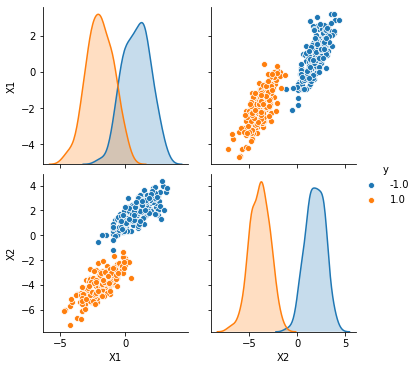

In [208]:
sns.pairplot(df, hue='y')

### Divide into train and test

In [209]:
df_train = df.groupby('y', group_keys=False).apply(lambda x:x.sample(frac=0.7))
df_train = df_train.sample(frac=1) # to distribute data randomly
df_test = df[~df.index.isin(df_train.index)]

In [210]:
X_train = np.array(df_train[['X1', 'X2']])
X_test = np.array(np.array(df_test[['X1', 'X2']]))
y_train = np.array(df_train['y'])
y_test = np.array(df_test['y'])

## SVM Class

In [356]:
class SVM:
    def __init__(self, learning_rate=0.001, lmbda=0.01, n_iters=5000):
        self.lr = learning_rate
        self.lmbda = lmbda
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.support_vectors_ = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lmbda * self.w)
                else:
                    self.w -= self.lr * (2 * self.lmbda * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]
        
        df =  np.dot(X, self.w) - self.b
        self.support_vectors_ = np.append(X[np.isclose(df, -1, atol=0.05)], X[np.isclose(df, 1, atol=0.05)], axis = 0)  
    
    def decision_function(self, X):
        return np.dot(X, self.w) - self.b
    
 
    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)
    
    def predict_proba(self, X):
        z = np.dot(X, self.w) - self.b
        return 1/(1+np.exp(-z))

In [357]:
# function that plot SVM decision boundaries 
def plot_svm_margin(model, X, y, plot_support=True):
    # continuous grid of values and evaluate the probability of each (x, y) point in the grid
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    xx, yy = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.decision_function(grid).reshape(xx.shape)
    
    f, ax = plt.subplots(figsize=(12, 9))
    # plot decision boundary and margins
    ax.contour(xx, yy, predictions,
               levels=[-1, 0, 1], alpha=0.9,
               linestyles=['--', '--', '--'], cmap='RdBu')

        
    ax.scatter(X[:,0], X[:,1], c=y,
            s=165, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=400, linewidth=1,facecolors='none', edgecolor='black');

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])

## Model Results

In [358]:
model = SVM()
model.fit(X_train, y_train)

In [359]:
prediction = model.predict(X_test)
accuracy = (prediction == y_test).sum()/len(y_test)*100
coeff = model.w
intercept = -model.b

In [360]:
accuracy

99.16666666666667

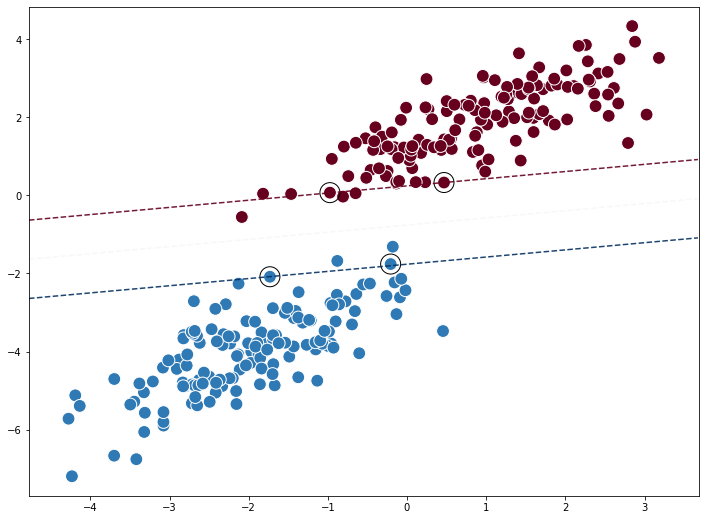

In [361]:
plot_svm_margin(model,X_train, y_train, plot_support=True)

## Sklearn SVC

In [362]:
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [363]:
accuracy = (clf.predict(X_test) == y_test).sum()/len(y_test)*100
coeff = clf.coef_,
intercept = clf.intercept_

In [364]:
accuracy

99.16666666666667

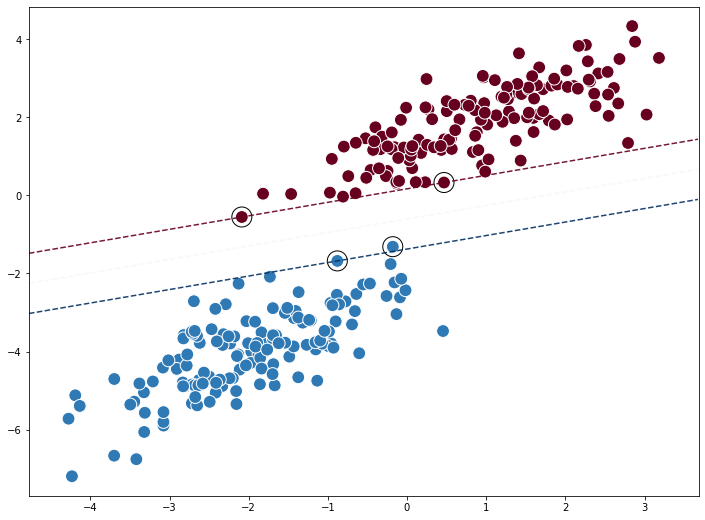

In [366]:
plot_svm_margin(clf,X_train, y_train, plot_support=True)